In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.graph_objects as go

# Example of Stock Pulling

In [ ]:
msft = yf.Ticker("MSFT")

In [ ]:
hist = msft.history(period="max")

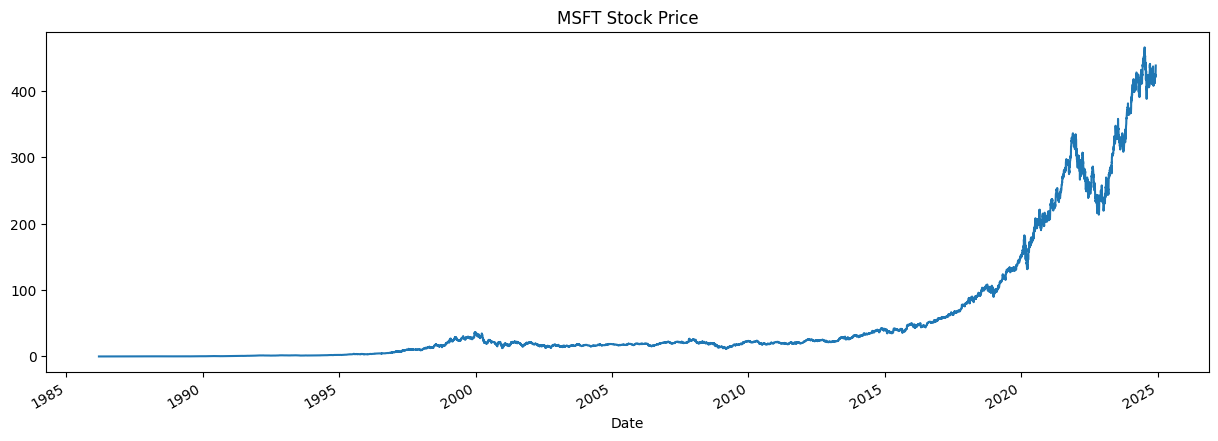

In [ ]:
hist["Open"].plot(figsize=(15, 5), title="MSFT Stock Price")
plt.show()

In [ ]:
stocks = [
    "^GSPC",
    "ETSY",
    "PINS",
    "SQ",
    "SHOP",
    "O",
    "MELI",
    "ISRG",
    "DIS",
    "BRK-B",
    "AMZN",
    "ZM",
    "PFE",
    "CLX",
    "DPZ",
    "RTX",
]

In [ ]:
hists = {}
for s in stocks:
    tkr = yf.Ticker(s)
    history = tkr.history(period="5y")
    hists[s] = history

In [ ]:
for stock in stocks:
    temp_df = hists[stock].copy()

    fig = go.Figure(
        data=[
            go.Candlestick(
                x=temp_df.index,
                open=temp_df["Open"],
                high=temp_df["High"],
                low=temp_df["Low"],
                close=temp_df["Close"],
            )
        ]
    )

    fig.update_layout(
        margin=dict(l=20, r=20, t=60, b=20),
        height=300,
        paper_bgcolor="LightSteelBlue",
        title=stock,
    )

    fig.show()

  0%|          | 0/8 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.



News with Sentiment Analysis:
                                               Title  \
0  Winners And Losers Of Q3: Reynolds (NASDAQ:REY...   
1  Like Passive Income? Then You'll Love These 3 ...   
2  3 High-Yield Dividend Stocks to Buy in Decembe...   
3  Household Products Stocks Q3 Results: Benchmar...   
4  Clorox's Pricing & Cost-Saving Efforts Bode We...   

                                                Link    Publisher  \
0  https://finance.yahoo.com/news/winners-losers-...   StockStory   
1  https://finance.yahoo.com/m/727489c0-88e5-32ed...  Motley Fool   
2  https://finance.yahoo.com/m/7838a970-412d-3a81...  Motley Fool   
3  https://finance.yahoo.com/news/household-produ...   StockStory   
4  https://finance.yahoo.com/news/cloroxs-pricing...        Zacks   

             Datetime Sentiment  Sentiment Score  
0 2024-12-05 06:34:57   neutral         0.912255  
1 2024-12-04 14:53:00  positive         0.935060  
2 2024-12-03 11:00:00   neutral         0.737821  
3 2024-12-03 

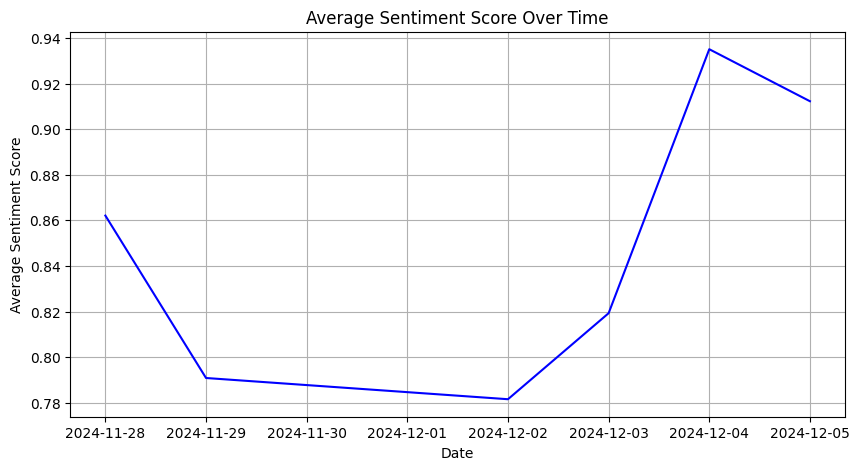

In [ ]:
import yfinance as yf
import pandas as pd
from tqdm.notebook import tqdm
from transformers import pipeline
import matplotlib.pyplot as plt

# Stock symbol to fetch news for
stock = "CLX"

# Fetching the stock data using yfinance
ticker = yf.Ticker(stock)
news = ticker.news

# Creating list to append news data
news_list = []

# Looping through the news articles and adding to the list
for i, item in tqdm(enumerate(news), total=len(news)):
    news_list.append(
        [item['title'], item['link'], item['publisher'], item['providerPublishTime']]
        # Attributes to be returned
    )

# Creating a dataframe from the news list above
news_df = pd.DataFrame(news_list, columns=["Title", "Link", "Publisher", "Datetime"])

# Convert the Datetime column from Unix timestamp to a readable format
news_df['Datetime'] = pd.to_datetime(news_df['Datetime'], unit='s')

# Step 2: Perform sentiment analysis on news titles using Hugging Face's RoBERTa model
sentiment_task = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

# Step 3: Analyze sentiment for each news title and add the results to the DataFrame
sentiment_results = news_df["Title"].apply(lambda x: sentiment_task(x)[0])
news_df["Sentiment"] = sentiment_results.apply(lambda x: x['label'])
news_df["Sentiment Score"] = sentiment_results.apply(lambda x: x['score'])

# Ensure Sentiment Score is numeric (if it's not already)
news_df["Sentiment Score"] = pd.to_numeric(news_df["Sentiment Score"], errors='coerce')

# Display the DataFrame with sentiment scores
print("\nNews with Sentiment Analysis:")
print(news_df.head())

# Step 4: Save the DataFrame to a Parquet file
news_df.to_parquet("yahoo_finance_news_with_sentiment.parquet")

# Step 5: Optional - Visualize Sentiment Scores
# Group by the 'Datetime' and calculate the mean sentiment score per day
daily_sentiment = news_df.groupby(news_df['Datetime'].dt.date)["Sentiment Score"].mean()

# Plotting the sentiment score trends over time
plt.figure(figsize=(10, 5))
daily_sentiment.plot(title="Average Sentiment Score Over Time", color='blue')
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.grid(True)
plt.show()

## Sentiment Analysis Prep

In [ ]:
from transformers import pipeline

model = f"cardiffnlp/twitter-roberta-base-sentiment-latest"

sentiment_task = pipeline("sentiment-analysis", model=model)
sentiment_task("Market Trends for Stock Prices")

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'neutral', 'score': 0.8937605619430542}]

In [ ]:
import pandas as pd

# Initialize an empty dictionary to store sentiment results
sent_results = {}
count = 0

# Loop through each row of the news DataFrame and analyze the sentiment of the news titles
for i, d in tqdm(news_df.iterrows(), total=len(news_df)):
    # Perform sentiment analysis on the news title
    sent = sentiment_task(d["Title"])

    # Store the sentiment analysis result in the dictionary with Link as the key
    sent_results[d["Link"]] = sent

    # Increment count
    count += 1

    # Stop after processing 500 news articles
    if count == 500:
        break

# Step 1: Convert sentiment results dictionary to DataFrame
sent_df = pd.DataFrame(sent_results).T

# Step 2: Extract the sentiment label and score from the sentiment result
sent_df["label"] = sent_df[0].apply(lambda x: x["label"])
sent_df["score"] = sent_df[0].apply(lambda x: x["score"])

# Drop the unnecessary 0 column
sent_df = sent_df.drop(columns=[0])

# Step 3: Merge the sentiment DataFrame with the original news DataFrame
# First, create a new DataFrame for news titles and links (from `news_df`)
news_for_merge = news_df[['Link', 'Title', 'Publisher', 'Datetime']]

# Merge sentiment data with the news DataFrame on the 'Link' column
sent_df = sent_df.merge(news_for_merge, left_index=True, right_on='Link')

# Step 4: Display the merged DataFrame
print(sent_df.head())

  0%|          | 0/8 [00:00<?, ?it/s]

      label     score                                               Link  \
0   neutral  0.912255  https://finance.yahoo.com/news/winners-losers-...   
1  positive  0.935060  https://finance.yahoo.com/m/727489c0-88e5-32ed...   
2   neutral  0.737821  https://finance.yahoo.com/m/7838a970-412d-3a81...   
3   neutral  0.900784  https://finance.yahoo.com/news/household-produ...   
4  positive  0.781575  https://finance.yahoo.com/news/cloroxs-pricing...   

                                               Title    Publisher  \
0  Winners And Losers Of Q3: Reynolds (NASDAQ:REY...   StockStory   
1  Like Passive Income? Then You'll Love These 3 ...  Motley Fool   
2  3 High-Yield Dividend Stocks to Buy in Decembe...  Motley Fool   
3  Household Products Stocks Q3 Results: Benchmar...   StockStory   
4  Clorox's Pricing & Cost-Saving Efforts Bode We...        Zacks   

             Datetime  
0 2024-12-05 06:34:57  
1 2024-12-04 14:53:00  
2 2024-12-03 11:00:00  
3 2024-12-03 08:03:31  
4 2024-1

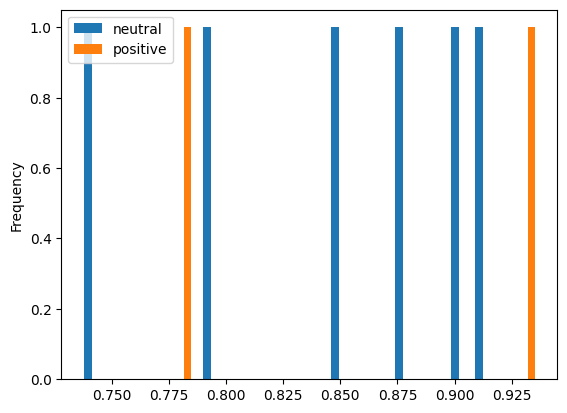

In [ ]:
sent_df.groupby("label")["score"].plot(kind="hist", bins=50)
plt.legend()
plt.show()

In [ ]:
sent_df["score_"] = sent_df["score"]

sent_df.loc[sent_df["label"] == "Negative", "score_"] = (
    sent_df.loc[sent_df["label"] == "Negative"]["score"] * -1
)

sent_df.loc[sent_df["label"] == "Neutral", "score_"] = 0

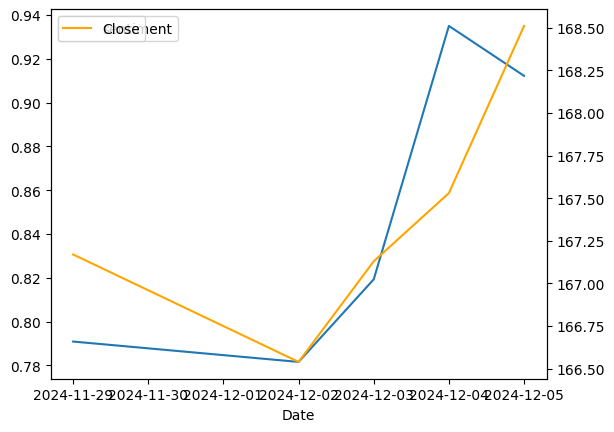

In [ ]:
sent_df["Date"] = sent_df["Datetime"].dt.date

sent_daily = sent_df.groupby("Date")["score_"].mean()

clx_df = hists["CLX"].copy()
clx_df = clx_df.reset_index()
clx_df["Date"] = clx_df["Date"].dt.date
clx_df = clx_df.set_index("Date")

sent_and_stock = sent_daily.to_frame("sentiment").merge(
    clx_df, left_index=True, right_index=True
)

ax = sent_and_stock["sentiment"].plot(legend="Sentiment")
ax2 = ax.twinx()
sent_and_stock["Close"].plot(ax=ax2, color="orange", legend="Closing Price")
plt.show()

# Scrapping Stock Data from Reddit

In [ ]:
!pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 15.2 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
import pandas as pd
import praw
import datetime
import numpy as np
import re
from transformers import pipeline, RobertaTokenizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Fetch stock data using yfinance
stock_symbol = 'AAPL'

# Define start and end dates for training and testing
start_train_date = '2024-09-01'
end_train_date = '2024-09-30'

start_test_date = '2024-10-01'
end_test_date = '2024-10-30'

# Fetch stock data for training and testing periods
train_data = yf.download(stock_symbol, start=start_train_date, end=end_train_date)
test_data = yf.download(stock_symbol, start=start_test_date, end=end_test_date)

# Check if stock data is available
if train_data.empty or test_data.empty:
    print("No data available for the specified stock during the given periods.")
else:
    print("Stock data successfully fetched for training and testing.")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Stock data successfully fetched for training and testing.


In [ ]:
# 2. Fetch Reddit data using PRAW
reddit = praw.Reddit(
    client_id="Paste your Client ID",
    client_secret="Paste Your secret code",
    user_agent="stock_sentiment_analysis"
)

subreddit_name = 'StockMarket'
start_date = datetime.date(2024, 9, 1)
end_date = datetime.date(2024, 10, 30)

subreddit = reddit.subreddit(subreddit_name)

# Fetch Reddit posts for the training period
posts = []
# Fetching a larger number of posts for training
for post in subreddit.new(limit=1000):
    post_date = datetime.datetime.utcfromtimestamp(post.created_utc).date()
    if start_date <= post_date <= end_date:
        posts.append({
            'post_id': post.id,
            'title': post.title,
            'content': post.selftext,
            'upvotes': post.score,
            'date': post_date
        })

# Check if posts are available
if posts:
    print(f"Found {len(posts)} posts between {start_date} and {end_date}.")
else:
    print("No posts found for the training period.")

# Preprocess Reddit posts and analyze sentiment
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove special characters
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)
    text = text.lower()
    return text

# Initialize sentiment analysis model
tokenizer = RobertaTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")
sentiment_task = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

# Function to analyze sentiment of long posts
def analyze_sentiment(text):
    if not text.strip():
        return 'neutral'

    chunks = [text[i:i + 512] for i in range(0, len(text), 512)]
    sentiments = [sentiment_task(chunk)[0]['label'] for chunk in chunks]
    return max(set(sentiments), key=sentiments.count)

# Clean text and analyze sentiment for each Reddit post
for post in posts:
    post['content_cleaned'] = clean_text(post['content'])
    post['sentiment'] = analyze_sentiment(post['content_cleaned'])

# Create DataFrame for Reddit data
reddit_df = pd.DataFrame(posts)

# Map sentiments to numeric values: positive = 1, negative = 0, neutral = 2
sentiment_mapping = {'positive': 1, 'negative': 0, 'neutral': 2}
reddit_df['sentiment_numeric'] = reddit_df['sentiment'].map(sentiment_mapping)

# Merge stock data with sentiment data (we can align by date)
reddit_df['date'] = pd.to_datetime(reddit_df['date'])

reddit_df

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Found 500 posts between 2024-09-01 and 2024-10-30.


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


,post_id,title,content,upvotes,date,content_cleaned,sentiment,sentiment_numeric
0,1gfxlj1,CEO buys $1.35M in stock. Is he bullish becaus...,,0,2024-10-30,,neutral,2
1,1gfw3w0,Advice/opinions?,Have been investing in and off for the past tw...,0,2024-10-30,have been investing in and off for the past tw...,neutral,2
2,1gfvz9c,Meta Reports Third Quarter 2024 Results,,7,2024-10-30,,neutral,2
3,1gfutlz,What would you do with this portfolio in the c...,On the fence,0,2024-10-30,on the fence,neutral,2
4,1gftxxl,Margin,Need clarity on what are these treasuries 10+ ...,0,2024-10-30,need clarity on what are these treasuries 10 y...,neutral,2
...,...,...,...,...,...,...,...,...
495,1f725vb,Daily General Discussion and Advice Thread - S...,Have a general question? Want to offer some c...,1,2024-09-02,have a general question want to offer some co...,neutral,2
496,1f6q9jo,Growth portfolio help,I just started this project for growth stocks....,22,2024-09-01,i just started this project for growth stocks ...,positive,1
497,1f6fjyn,CNN Fear Greed Index at a Closing 50 Day High ...,Today the [CNN](https://twitter.com/CNN) Fear ...,140,2024-09-01,today the cnn fear greed index closed at a 50 ...,neutral,2
498,1f6crse,"Interesting, thoughts?",,493,2024-09-01,,neutral,2


In [ ]:
train_data['Date'] = train_data.index
test_data['Date'] = test_data.index

# Filter train and test data based on dates
train_data_filtered = train_data[(train_data['Date'] >= start_train_date) & (train_data['Date'] <= end_train_date)]
test_data_filtered = test_data[(test_data['Date'] >= start_test_date) & (test_data['Date'] <= end_test_date)]

# Sample sentiment data to match stock data dates
train_sentiment = reddit_df[reddit_df['date'].isin(train_data_filtered['Date'].dt.date)]
test_sentiment = reddit_df[reddit_df['date'].isin(test_data_filtered['Date'].dt.date)]

<ipython-input-18-9b5812531bd6>:9: FutureWarning:

The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.

<ipython-input-18-9b5812531bd6>:10: FutureWarning:

The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.



In [ ]:
train_data_filtered['Date'] = pd.to_datetime(train_data_filtered['Date']).dt.date

# Ensure 'date' column in train_sentiment is in the correct format
train_sentiment['date'] = pd.to_datetime(train_sentiment['date']).dt.date

<ipython-input-19-b2f5183067a1>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
train_data_filtered

Price,Adj Close,Close,High,Low,Open,Volume,Date
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,,
2024-09-03 00:00:00+00:00,222.525177,222.770004,229.000000,221.169998,228.550003,50190600,2024-09-03
2024-09-04 00:00:00+00:00,220.607300,220.850006,221.779999,217.479996,221.660004,43840200,2024-09-04
2024-09-05 00:00:00+00:00,222.135605,222.380005,225.479996,221.520004,221.630005,36615400,2024-09-05
2024-09-06 00:00:00+00:00,220.577332,220.820007,225.240005,219.770004,223.949997,48423000,2024-09-06
2024-09-09 00:00:00+00:00,220.667221,220.910004,221.270004,216.710007,220.820007,67180000,2024-09-09
2024-09-10 00:00:00+00:00,219.868103,220.110001,221.479996,216.729996,218.919998,51591000,2024-09-10
2024-09-11 00:00:00+00:00,222.415298,222.660004,223.089996,217.889999,221.460007,44587100,2024-09-11
2024-09-12 00:00:00+00:00,222.525177,222.770004,223.550003,219.820007,222.500000,37498200,2024-09-12


In [ ]:
train_sentiment

,post_id,title,content,upvotes,date,content_cleaned,sentiment,sentiment_numeric
267,1fqx53k,New to this what do these numbers mean,Just stocks on 5x leverage except lunr.\n,0,2024-09-27,just stocks on 5x leverage except lunr,neutral,2
268,1fqpsbr,Other space stocks are skyrocketing but not AS...,,0,2024-09-27,,neutral,2
269,1fqngt1,These are the stocks on my watchlist (9/27),Hi! I am an ex-prop shop equity trader. \nThi...,25,2024-09-27,hi i am an exprop shop equity trader this is ...,neutral,2
270,1fqn8xm,Data: 9/27/2024,**Data Summary (Short Version): 9/27/2024**\n\...,21,2024-09-27,data summary short version 9272024 core pce au...,neutral,2
271,1fqje8a,Daily General Discussion and Advice Thread - S...,Have a general question? Want to offer some c...,8,2024-09-27,have a general question want to offer some co...,neutral,2
...,...,...,...,...,...,...,...,...
489,1f7zdgd,TSM investment?,Does anyone have any opinions on if this is a ...,12,2024-09-03,does anyone have any opinions on if this is a ...,neutral,2
490,1f7v8x3,Daily General Discussion and Advice Thread - S...,Have a general question? Want to offer some c...,1,2024-09-03,have a general question want to offer some co...,neutral,2
491,1f7oxjp,Any helpful advice?,Im pretty diverse. $1000 in each company i own...,19,2024-09-03,im pretty diverse 1000 in each company i own b...,neutral,2
492,1f7nzxt,When News Makes No Sense,"I’m not sure of everyone’s experience. But, fr...",27,2024-09-03,im not sure of everyones experience but from t...,negative,0


Merging sentiment data and stock price data on date column

In [ ]:
import pandas as pd

# Flatten MultiIndex columns
train_data_filtered.columns = [f'{col[0]}_{col[1]}' if col[1] else col[0] for col in train_data_filtered.columns]

# Convert dates to standard format
train_data_filtered['date'] = pd.to_datetime(train_data_filtered['Date']).dt.date
train_sentiment['date'] = pd.to_datetime(train_sentiment['date']).dt.date

# Merge with flattened columns
merged_data = pd.merge(
    train_data_filtered,
    train_sentiment,
    on='date',
    how='outer'
)

# Display merge results
# print(merged_data.info())
# print("\nSample of merged data:")
# print(merged_data.head())
merged_data = pd.DataFrame(merged_data)

<ipython-input-22-9bcf93d1ed48>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
merged_data.head()

,Adj Close_AAPL,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,Date,date,post_id,title,content,upvotes,content_cleaned,sentiment,sentiment_numeric
0,222.525177,222.770004,229.0,221.169998,228.550003,50190600,2024-09-03,2024-09-03,1f8ako4,Nvidia Gets DOJ Subpoena in Escalating Antitru...,,250,,neutral,2
1,222.525177,222.770004,229.0,221.169998,228.550003,50190600,2024-09-03,2024-09-03,1f89u8y,22 Y/O Getting His Feet Wet in the Market,So I literally started in corporate at the beg...,0,so i literally started in corporate at the beg...,neutral,2
2,222.525177,222.770004,229.0,221.169998,228.550003,50190600,2024-09-03,2024-09-03,1f86a5s,What is happening in the market??,anyone know why this is happening today? i’m d...,197,anyone know why this is happening today im dow...,negative,0
3,222.525177,222.770004,229.0,221.169998,228.550003,50190600,2024-09-03,2024-09-03,1f7ztpp,These are the stocks on my watchlist (9/3),Hi! I am an ex-prop shop equity trader. \nThi...,11,hi i am an exprop shop equity trader this is ...,neutral,2
4,222.525177,222.770004,229.0,221.169998,228.550003,50190600,2024-09-03,2024-09-03,1f7zdgd,TSM investment?,Does anyone have any opinions on if this is a ...,12,does anyone have any opinions on if this is a ...,neutral,2


#Data Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive Statistics
print("Descriptive Statistics:")
print(merged_data.describe())

# Missing Value Analysis
print("\nMissing Values:")
print(merged_data.isnull().sum())

# Correlation Analysis
correlation_columns = [
    'Close_AAPL', 'High_AAPL', 'Low_AAPL',
    'Open_AAPL', 'Volume_AAPL',
    'sentiment_numeric', 'upvotes'
]

Descriptive Statistics:
       Adj Close_AAPL  Close_AAPL   High_AAPL    Low_AAPL   Open_AAPL  \
count      192.000000  192.000000  192.000000  192.000000  192.000000   
mean       223.078684  223.324115  225.056615  220.776720  223.208908   
std          3.607945    3.611915    4.169638    4.023975    3.900967   
min        216.082275  216.320007  216.899994  213.919998  215.750000   
25%        220.607300  220.850006  221.779999  217.479996  220.820007   
50%        222.415298  222.660004  224.039993  219.820007  223.580002   
75%        227.120117  227.369995  229.350006  224.630005  224.990005   
max        228.618469  228.869995  233.089996  227.619995  229.970001   

        Volume_AAPL      upvotes  sentiment_numeric  
count  1.920000e+02   192.000000         192.000000  
mean   6.041220e+07    58.546875           1.671875  
std    5.501210e+07   176.209353           0.664461  
min    3.402600e+07     0.000000           0.000000  
25%    4.230870e+07     1.000000           2.000

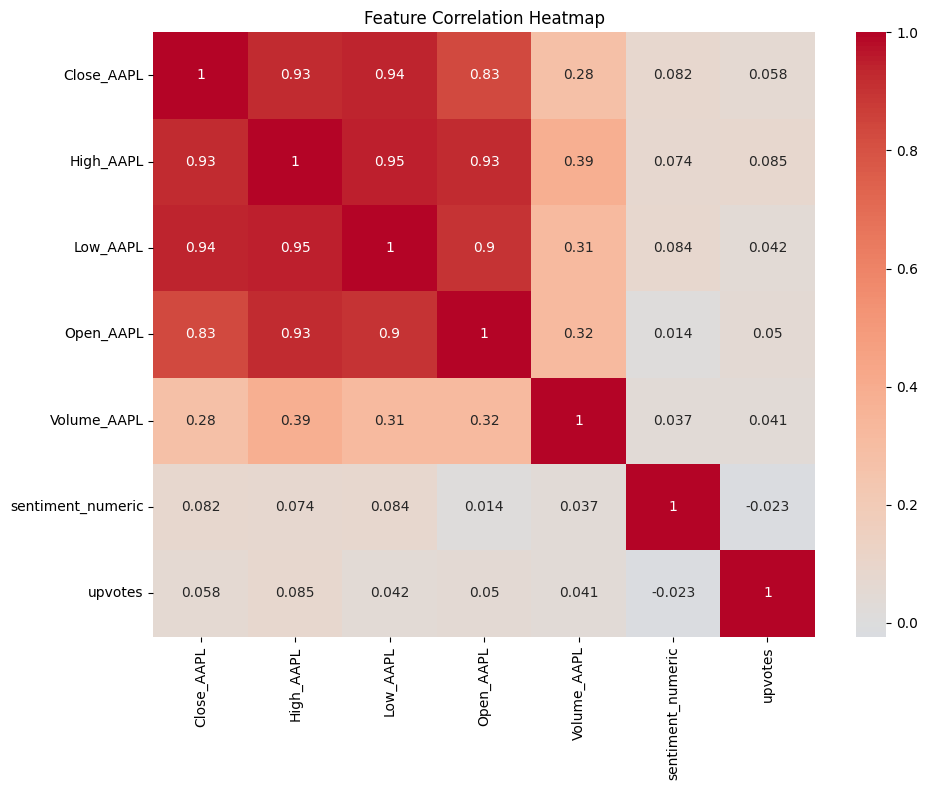

In [ ]:
correlation_matrix = merged_data[correlation_columns].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

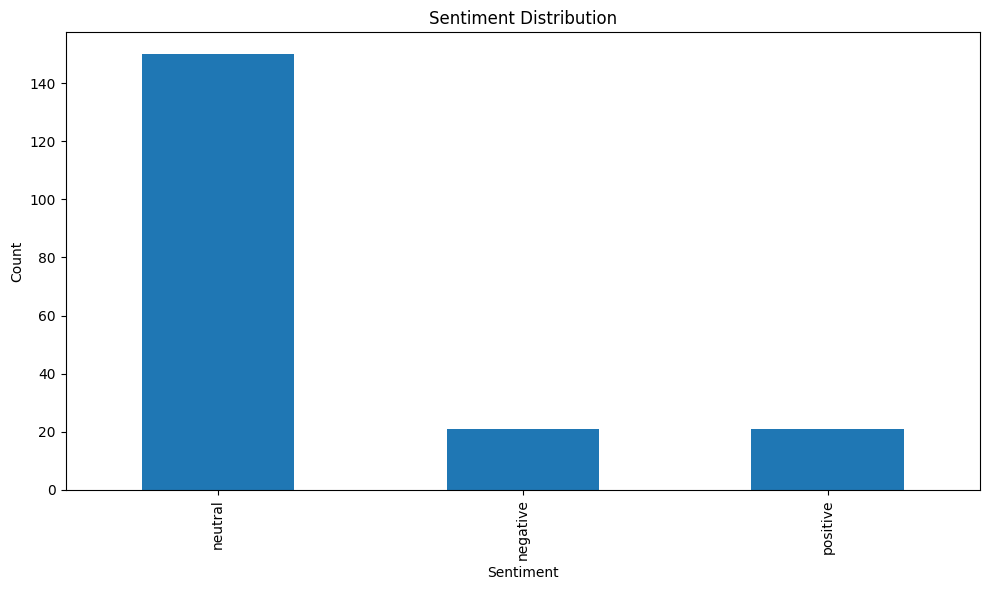

In [ ]:
# Sentiment Distribution
plt.figure(figsize=(10,6))
merged_data['sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

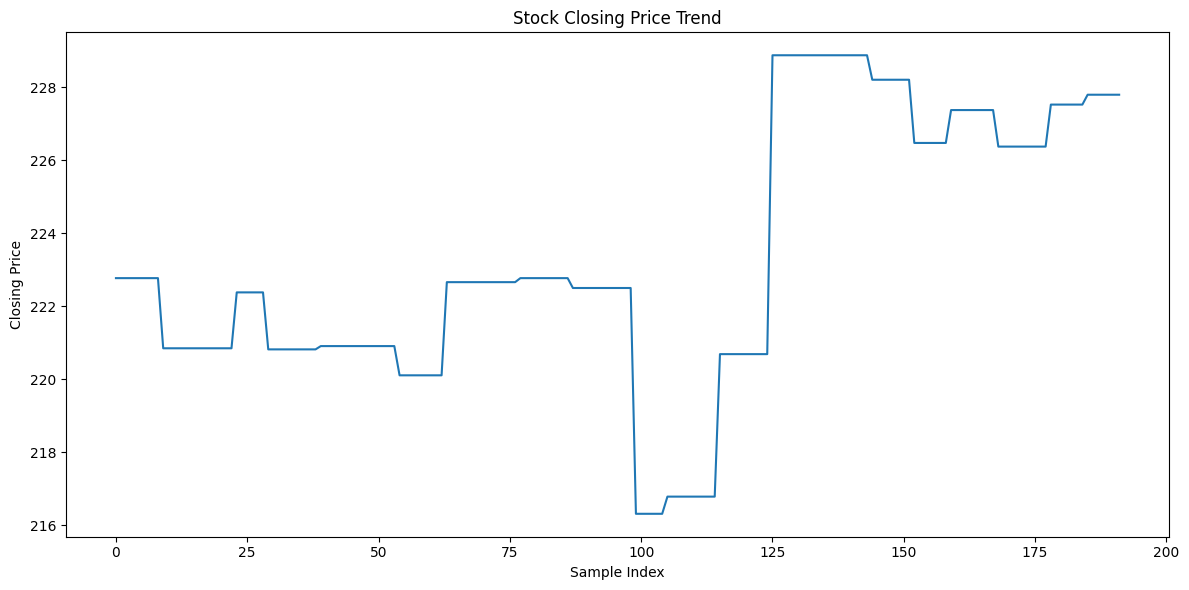

In [ ]:
# Stock Price Trend
plt.figure(figsize=(12,6))
merged_data['Close_AAPL'].plot()
plt.title('Stock Closing Price Trend')
plt.xlabel('Sample Index')
plt.ylabel('Closing Price')
plt.tight_layout()
plt.show()

#Prediction model for stock price prediction

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Prepare features
merged_data['sentiment_impact'] = merged_data['sentiment_numeric'] * merged_data['upvotes']
features = ['Close_AAPL', 'High_AAPL', 'Low_AAPL', 'Open_AAPL', 'Volume_AAPL', 'sentiment_impact']

# Prepare X and y
X = merged_data[features].fillna(merged_data[features].mean())
# Predict next day's closing price
y = merged_data['Close_AAPL'].shift(-1)
# Align with shifted target
X = X[:-1]
y = y[:-1]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

Mean Squared Error: 1.0954162361765047
R-squared Score: 0.9183240343072856

Feature Importance:
            feature  importance
0        Close_AAPL    0.470877
2          Low_AAPL    0.421538
1         High_AAPL    0.036625
3         Open_AAPL    0.034493
5  sentiment_impact    0.033976
4       Volume_AAPL    0.002492


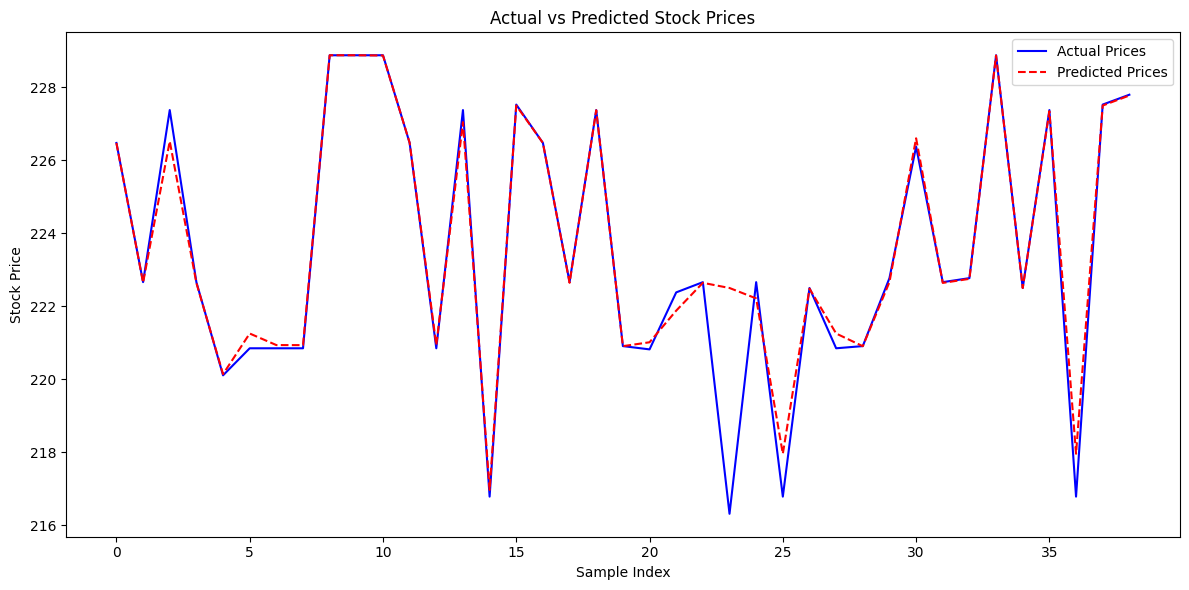

Mean Absolute Error: $0.33


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red', linestyle='--')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Sample Index')
plt.ylabel('Stock Price')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate prediction accuracy metrics
absolute_errors = np.abs(y_test.values - y_pred)
mean_absolute_error = np.mean(absolute_errors)
print(f"Mean Absolute Error: ${mean_absolute_error:.2f}")

Model Performance Metrics:
Mean Absolute Error: $0.33
Root Mean Squared Error: $1.05
R-squared Score: 0.9183
Mean Absolute Percentage Error: 0.15%


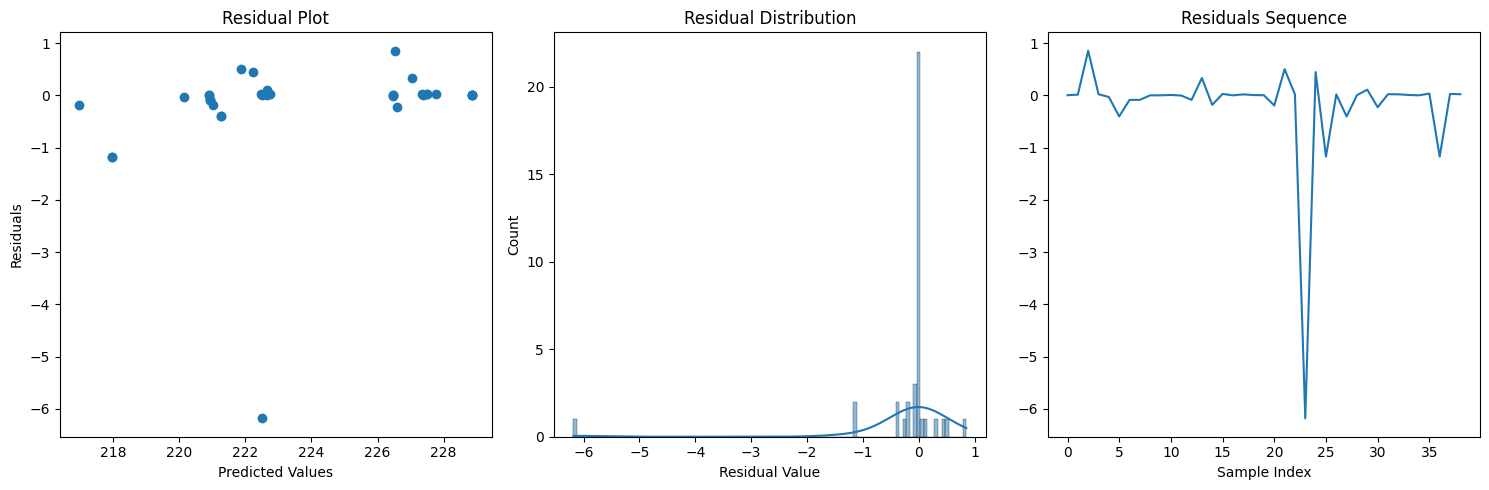

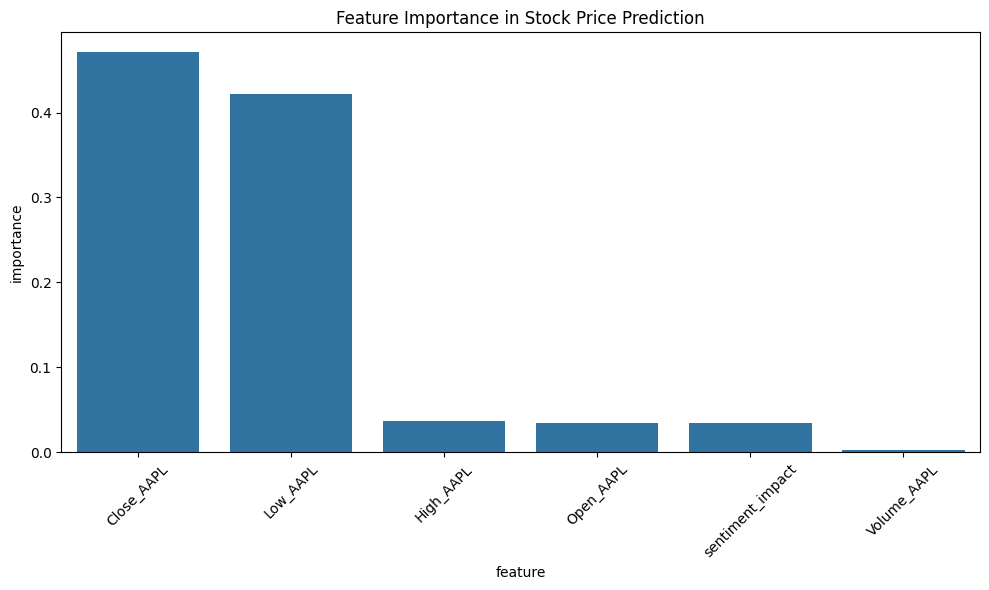

In [ ]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error
)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Comprehensive Performance Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Performance Report
print("Model Performance Metrics:")
print(f"Mean Absolute Error: ${mae:.2f}")
print(f"Root Mean Squared Error: ${rmse:.2f}")
print(f"R-squared Score: {r2:.4f}")
print(f"Mean Absolute Percentage Error: {mape*100:.2f}%")

# Residual Analysis
residuals = y_test.values - y_pred

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.scatter(y_pred, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.subplot(132)
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')
plt.xlabel('Residual Value')

plt.subplot(133)
plt.plot(residuals)
plt.title('Residuals Sequence')
plt.xlabel('Sample Index')

plt.tight_layout()
plt.show()

# Feature Impact Visualization
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance['feature'], y=feature_importance['importance'])
plt.title('Feature Importance in Stock Price Prediction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Classification Model for Stock price movement

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare target variable (stock movement)
merged_data['stock_movement'] = np.where(
    merged_data['Close_AAPL'].diff() > 0,
    1,  # Up
    np.where(merged_data['Close_AAPL'].diff() < 0, -1, 0)  # Down or Flat
)

# Prepare features
features = ['Close_AAPL', 'High_AAPL', 'Low_AAPL', 'Open_AAPL', 'Volume_AAPL',
            'sentiment_numeric', 'upvotes']

# Prepare X and y
X = merged_data[features].fillna(merged_data[features].mean())
y = merged_data['stock_movement'].shift(-1)

# Align data
X = X[:-1]
y = y[:-1]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = rf_classifier.predict(X_test_scaled)

# Performance Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         1
         0.0       0.92      0.97      0.95        36
         1.0       0.00      0.00      0.00         2

    accuracy                           0.90        39
   macro avg       0.31      0.32      0.32        39
weighted avg       0.85      0.90      0.87        39



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



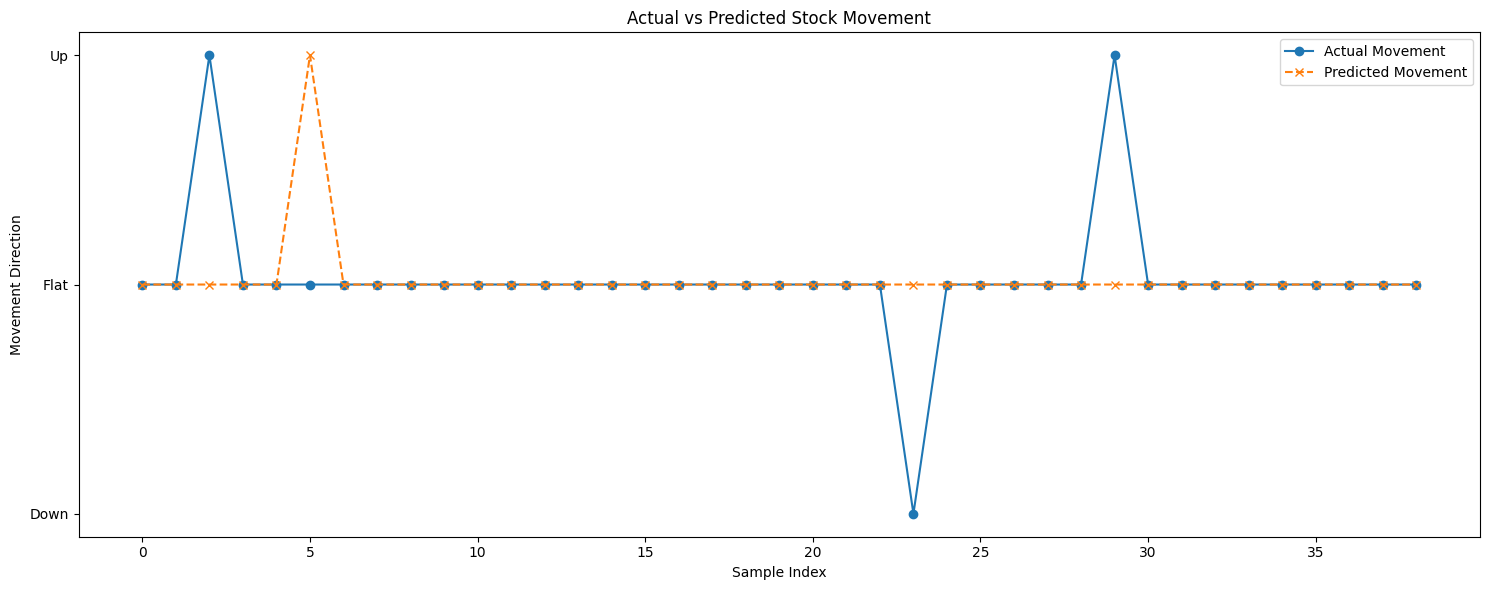


Movement Comparison:
Actual  Predicted
 0.0    0.0          35
 1.0    0.0           2
-1.0    0.0           1
 0.0    1.0           1
Name: count, dtype: int64

Accuracy for Down movement: 0.00%

Accuracy for Flat movement: 97.22%

Accuracy for Up movement: 0.00%


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create visualization of predicted vs actual movement
plt.figure(figsize=(15,6))
plt.plot(y_test.values, label='Actual Movement', marker='o')
plt.plot(y_pred, label='Predicted Movement', marker='x', linestyle='--')
plt.title('Actual vs Predicted Stock Movement')
plt.xlabel('Sample Index')
plt.ylabel('Movement Direction')
plt.legend()
plt.yticks([-1, 0, 1], ['Down', 'Flat', 'Up'])
plt.tight_layout()
plt.show()

# Detailed Movement Comparison
movement_comparison = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
print("\nMovement Comparison:")
print(movement_comparison.value_counts())

# Accuracy for each movement type
for movement in [-1, 0, 1]:
    movement_mask = y_test.values == movement
    movement_accuracy = np.mean(y_pred[movement_mask] == y_test.values[movement_mask])
    print(f"\nAccuracy for {['Down', 'Flat', 'Up'][movement+1]} movement: {movement_accuracy:.2%}")

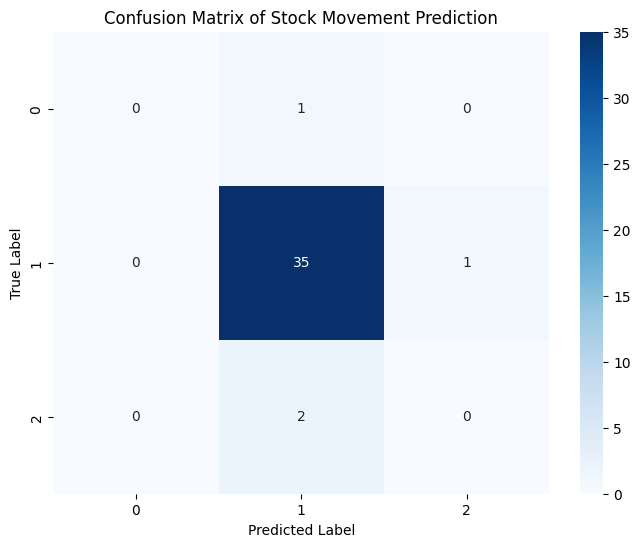

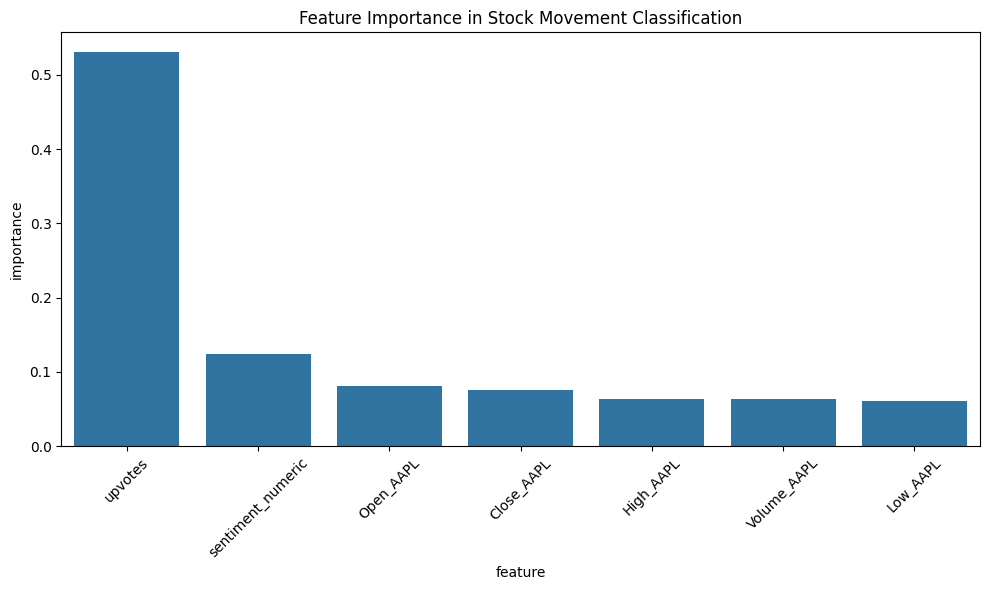

In [ ]:
# Confusion Matrix Visualization
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of Stock Movement Prediction')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='feature', y='importance', data=feature_importance)
plt.title('Feature Importance in Stock Movement Classification')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()